In [2]:
import redis
import os
import matplotlib.pyplot as plt

# Open Redis
REDIS_IP_ADDRESS = os.getenv("REDIS_IP_ADDRESS", "localhost")
REDIS_PORT = int(os.getenv("REDIS_PORT", "6379"))
# Open connection to redis here and store the client as a property of this object
    
redis_client = redis.Redis(host=REDIS_IP_ADDRESS, port=REDIS_PORT, db=0)

In [23]:
# Set the key
key = 'sim_ts'
#key = 'web_ts'

In [27]:
# Get Range (zpopmax and min are destructive they pull the data out of the set)
max = redis_client.zpopmax(key)
#print(max)

min = redis_client.zpopmin(key)
#print(min)
# Put them back
max_member = max[0][0]
max_score  = max[0][1]
redis_client.zadd(key, {max_member: max_score})

min_member = min[0][0]
min_score  = min[0][1]
redis_client.zadd(key, {min_member: min_score})

print("Min",min_score,"Max",max_score)
# Calculate the time interval
dif_score = max_score - min_score
# In milliseconds
print("Milliseconds", dif_score)
# Seconds
seconds = dif_score/1000.0
print("Seconds", seconds)
# Minutes
minutes = seconds/60
print("Minutes", minutes)
# Hours
hours = minutes/60
print("Hours", hours)

Min 1623440788045.0 Max 1623671587359.0
Milliseconds 230799314.0
Seconds 230799.314
Minutes 3846.6552333333334
Hours 64.11092055555555


In [28]:
# One hour is how many ms
ms_hr = 60 * 60 * 1000
print(ms_hr)

3600000


In [36]:
import math
# Calc Interactions Per Hour
hour_blocks = math.floor(hours + 1)
interactions_per_hr = []
for h in range(hour_blocks):
    selection_min = min_score + (h * ms_hr)
    selection_max = ms_hr + selection_min

    results = redis_client.zrangebyscore(key, selection_min, selection_max)
    
    interactions_per_hr.append(len(results))
    

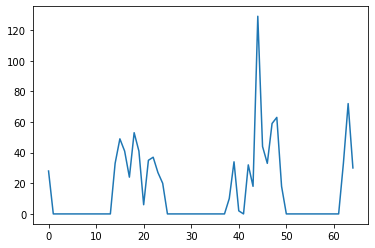

In [38]:
# Plot
import matplotlib.pyplot as plt
x = list(range(len(interactions_per_hr)))
plt.plot(x,interactions_per_hr)
plt.show()